<div style="text-align: right"> IMC Prosperity </div>

<left> Team Tempname1 </left> 
<br>
<left>February 2024</left>

<h2><center> Round 2: Data Exploration </center></h2>

### Import Statements

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from utils.DataEngine import LogInterpreter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Data

The codes below separately load all 3 csv files as dataframes. The column 'day' has been shifted to the begining of all dataframes and all columns have been converted to numeric. Also, a 4th dataframe 'orchids' has been created that combines all 3 dataframes in order of day. Within that dataframe, a new column 'new_timestamp' has been created to plot time series reflecting values from days -1 to 1 to avoid overlapping timestamp values.

In [262]:
prices_neg1 = pd.read_csv("prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_neg1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490
...,...,...,...,...,...,...,...,...
9996,-1,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764
9997,-1,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300
9998,-1,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856
9999,-1,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424


In [263]:
prices_0 = pd.read_csv("prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_0

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000
1,0,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990
2,0,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980
3,0,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970
4,0,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950
...,...,...,...,...,...,...,...,...
9996,0,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100
9997,0,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806
9998,0,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530
9999,0,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260


In [264]:
prices_pos1 = pd.read_csv("prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

prices_pos1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,1,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000
1,1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710
2,1,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395
3,1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030
4,1,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640
...,...,...,...,...,...,...,...,...
9996,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490
9997,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530
9998,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620
9999,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780


In [265]:
orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [266]:
timestamps = prices_0['timestamp']
sunlight_rates = prices_0['SUNLIGHT']

# Define the threshold
threshold = 2500

# Find the indices where sunlight_rates is below the threshold
below_threshold_indices = np.where(sunlight_rates < threshold)[0]

# If there are no values below the threshold, the area is zero
if len(below_threshold_indices) == 0:
    area_under_curve = 0
else:
    # Define the timestamps and sunlight_rates where the sunlight is below the threshold
    timestamps_below_threshold = timestamps[below_threshold_indices]
    sunlight_rates_below_threshold = sunlight_rates[below_threshold_indices]

    # Use the trapezoidal rule to calculate the area under the curve
    area_under_curve = np.trapz(sunlight_rates_below_threshold - threshold, timestamps_below_threshold)

print("Area under the curve where sunlight is below 2500 units:", area_under_curve)

Area under the curve where sunlight is below 2500 units: -470411122.12500006


### Visualize Data

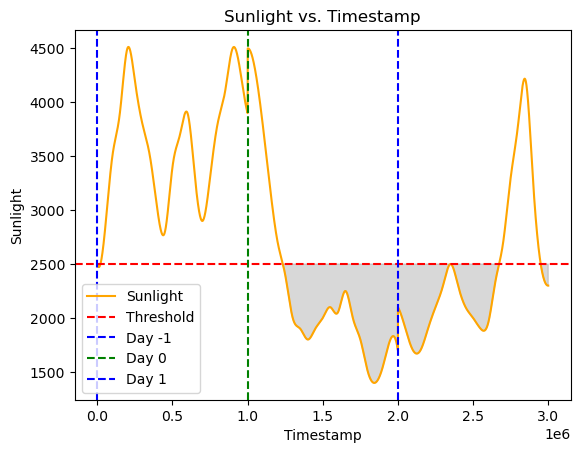

In [267]:
plt.plot(orchids["new_timestamp"], orchids["SUNLIGHT"], color='orange', label='Sunlight')

plt.axhline(y=2500, color='red', linestyle='--', label='Threshold')

plt.fill_between(orchids["new_timestamp"], 2500, orchids["SUNLIGHT"], where=(orchids["SUNLIGHT"] <= 2500), color='grey', alpha=0.3)

plt.axvline(0, color='blue', linestyle='--', label='Day -1')
plt.axvline(1000100, color='green', linestyle='--', label='Day 0')
plt.axvline(2000200, color='blue', linestyle='--', label='Day 1')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sunlight')
plt.title('Sunlight vs. Timestamp')
plt.legend()

# Show plot
plt.show()

The codes below plot timeseries plots for all variables in the data set. 

In [268]:
day_avg = orchids.groupby('DAY')['SUNLIGHT'].mean()
day_avg

DAY
-1    3619.750103
 0    2279.533353
 1    2431.936381
Name: SUNLIGHT, dtype: float64

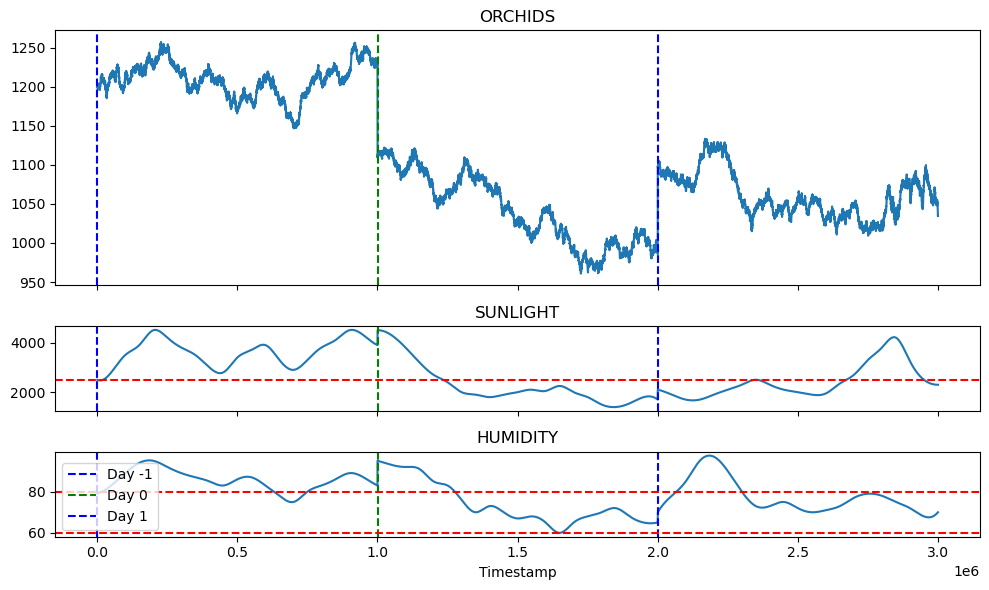

In [269]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    # Create dashed line between 60 to 80 for HUMIDITY plot
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')

    axs[1].axhline(2500, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [270]:
orchids['sunlight_derivative'] = orchids['SUNLIGHT'].diff()
orchids['humidity_derivative'] = orchids['HUMIDITY'].diff()
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,sunlight_derivative,humidity_derivative
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,NaN,NaN
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,-0.5803,0.00410
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,-0.5740,0.00411
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,-0.5677,0.00413
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,-0.5614,0.00415
...,...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.0106,0.01597
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.0120,0.01604
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.0134,0.01609
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.0150,0.01616


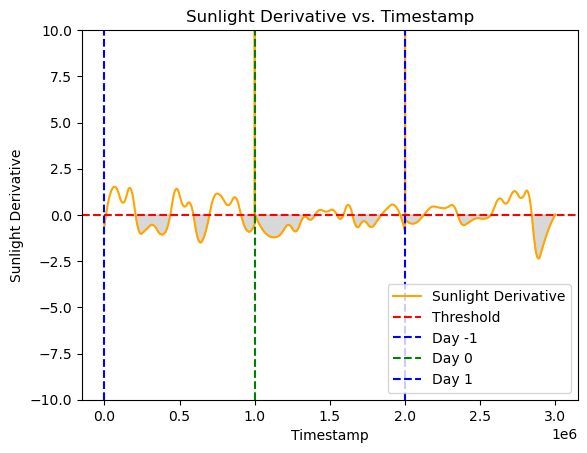

In [271]:
plt.plot(orchids["new_timestamp"], orchids["sunlight_derivative"], color='orange', label='Sunlight Derivative')

plt.axhline(y=0, color='red', linestyle='--', label='Threshold')

plt.fill_between(orchids["new_timestamp"], 0, orchids["sunlight_derivative"], where=(orchids["sunlight_derivative"] <= 0), color='grey', alpha=0.3)

plt.axvline(0, color='blue', linestyle='--', label='Day -1')
plt.axvline(1000100, color='green', linestyle='--', label='Day 0')
plt.axvline(2000200, color='blue', linestyle='--', label='Day 1')

plt.ylim(-10, 10)

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sunlight Derivative')
plt.title('Sunlight Derivative vs. Timestamp')
plt.legend()

# Show plot
plt.show()

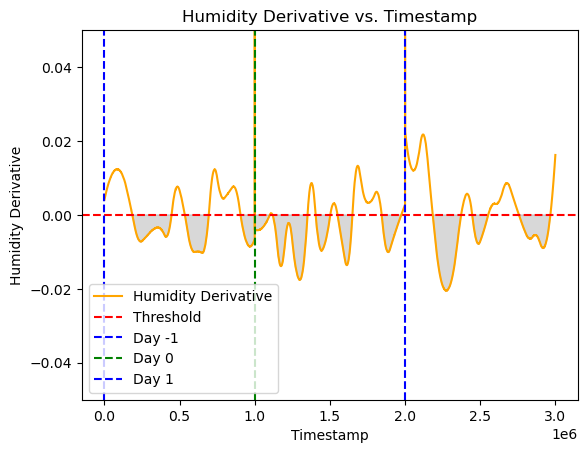

In [272]:
plt.plot(orchids["new_timestamp"], orchids["humidity_derivative"], color='orange', label='Humidity Derivative')

plt.axhline(y=0, color='red', linestyle='--', label='Threshold')

plt.fill_between(orchids["new_timestamp"], 0, orchids["humidity_derivative"], where=(orchids["humidity_derivative"] <= 0), color='grey', alpha=0.3)

plt.axvline(0, color='blue', linestyle='--', label='Day -1')
plt.axvline(1000100, color='green', linestyle='--', label='Day 0')
plt.axvline(2000200, color='blue', linestyle='--', label='Day 1')

plt.ylim(-0.05, 0.05)

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Humidity Derivative')
plt.title('Humidity Derivative vs. Timestamp')
plt.legend()

# Show plot
plt.show()

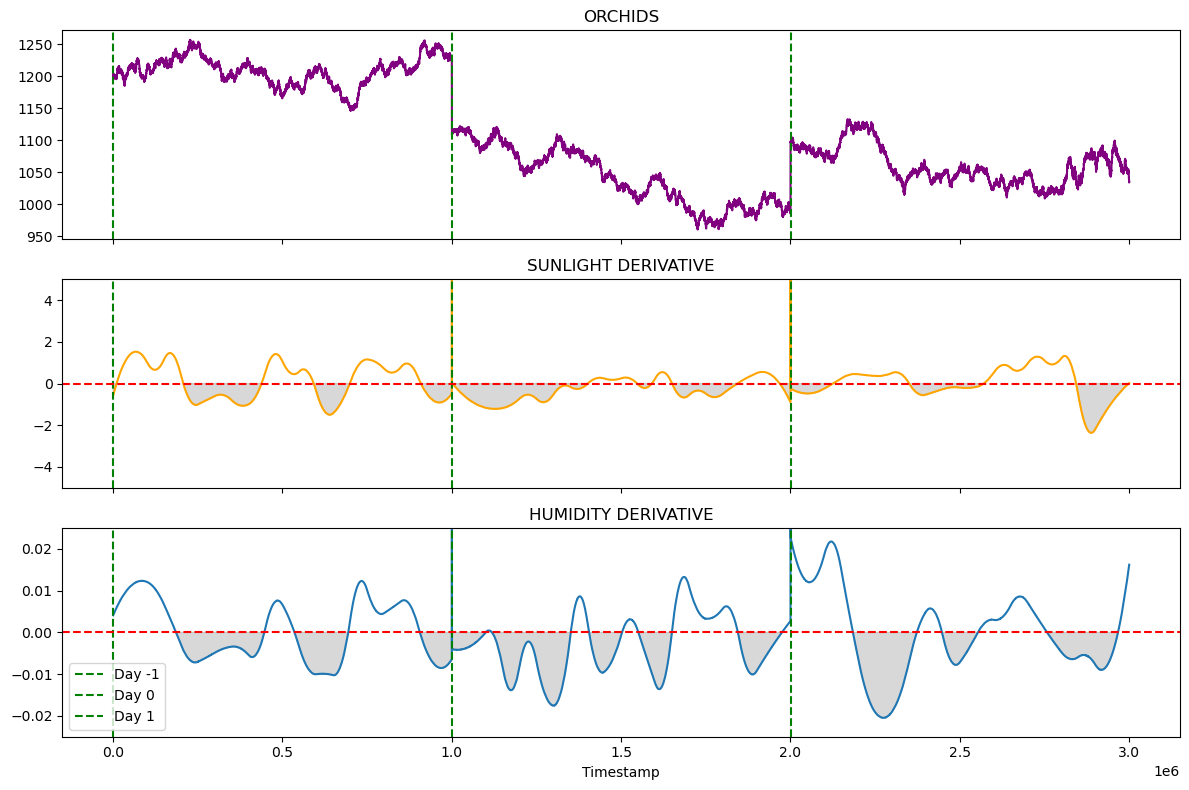

In [273]:
def plot_orchids_sunlight_humidity_derivatives(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], color='purple')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['sunlight_derivative'], color='orange')
    axs[1].set_title('SUNLIGHT DERIVATIVE')
    axs[1].set_ylim(-5, 5)  # Set y-axis bounds for sunlight derivative
    axs[1].fill_between(orchids["new_timestamp"], 0, orchids["sunlight_derivative"], where=(orchids["sunlight_derivative"] <= 0), color='grey', alpha=0.3)
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['humidity_derivative'])
    axs[2].set_title('HUMIDITY DERIVATIVE')
    axs[2].set_ylim(-0.025, 0.025)  # Set y-axis bounds for humidity derivative
    axs[2].fill_between(orchids["new_timestamp"], 0, orchids["humidity_derivative"], where=(orchids["humidity_derivative"] <= 0), color='grey', alpha=0.3)
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='green', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
    
    axs[1].axhline(0, color='red', linestyle='--')
    axs[2].axhline(0, color='red', linestyle='--')
    
    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity_derivatives(orchids)

In [274]:
# Create lagged variables
orchids_lag = orchids.copy()

orchids_lag['ORCHIDS_lag1'] = orchids_lag['ORCHIDS'].shift(14)
orchids_lag['ORCHIDS_lag2'] = orchids_lag['ORCHIDS'].shift(140)
orchids_lag['ORCHIDS_lag3'] = orchids_lag['ORCHIDS'].shift(833)

# Drop rows with NaN values resulting from the shift operation
orchids_lag = orchids_lag.dropna()

# Define independent variables (lagged predictors) and the dependent variable
X = orchids_lag[['sunlight_derivative','humidity_derivative']]
y = orchids_lag['ORCHIDS_lag1']

# Fit the regression model without intercept
model = sm.OLS(y, X).fit(has_constant=False)

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           ORCHIDS_lag1   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8300
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                       0.436
Time:                        18:20:03   Log-Likelihood:                     -2.4577e+05
No. Observations:               29170   AIC:                                  4.915e+05
Df Residuals:                   29168   BIC:                                  4.916e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [275]:
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ORCHIDS_lag1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.035
Date:                Sat, 13 Apr 2024   Prob (F-statistic):              0.355
Time:                        18:20:04   Log-Likelihood:            -1.6964e+05
No. Observations:               29170   AIC:                         3.393e+05
Df Residuals:                   29167   BIC:                         3.393e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1100.7124    

## Region Segmentation

In [277]:
condition_1 = (orchids["SUNLIGHT"] > 2500) & (orchids["HUMIDITY"].between(60, 80))
condition_2 = (orchids["SUNLIGHT"] > 2500) & ~(orchids["HUMIDITY"].between(60, 80))
condition_3 = (orchids["SUNLIGHT"] < 2500) & (orchids["HUMIDITY"].between(60, 80))
condition_4 = (orchids["SUNLIGHT"] < 2500) & ~(orchids["HUMIDITY"].between(60, 80))

region_1 = orchids[condition_1]
region_1.reset_index(inplace=True)
region_2 = orchids[condition_2]
region_2.reset_index(inplace=True)
region_3 = orchids[condition_3]
region_3.reset_index(inplace=True)
region_4 = orchids[condition_4]
region_4.reset_index(inplace=True)

price_behavior = {
    "Region 1 (ideal sunlight + humidity)": region_1["ORCHIDS"].mean(),
    "Region 2 (ideal sunlight / not ideal humidity)": region_2["ORCHIDS"].mean(),
    "Region 3 (not ideal sunlight / ideal humidity)": region_3["ORCHIDS"].mean(),
    "Region 4 (not ideal sunlight / not ideal humidity)": region_4["ORCHIDS"].mean()
}

print("Price Behavior in Different Regions:")
for region, price_mean in price_behavior.items():
    print(f"{region}: {price_mean}")

Price Behavior in Different Regions:
Region 1 (ideal sunlight + humidity): 1084.389791037261
Region 2 (ideal sunlight / not ideal humidity): 1188.1069339062071
Region 3 (not ideal sunlight / ideal humidity): 1037.0578970899041
Region 4 (not ideal sunlight / not ideal humidity): 1093.1962683889487


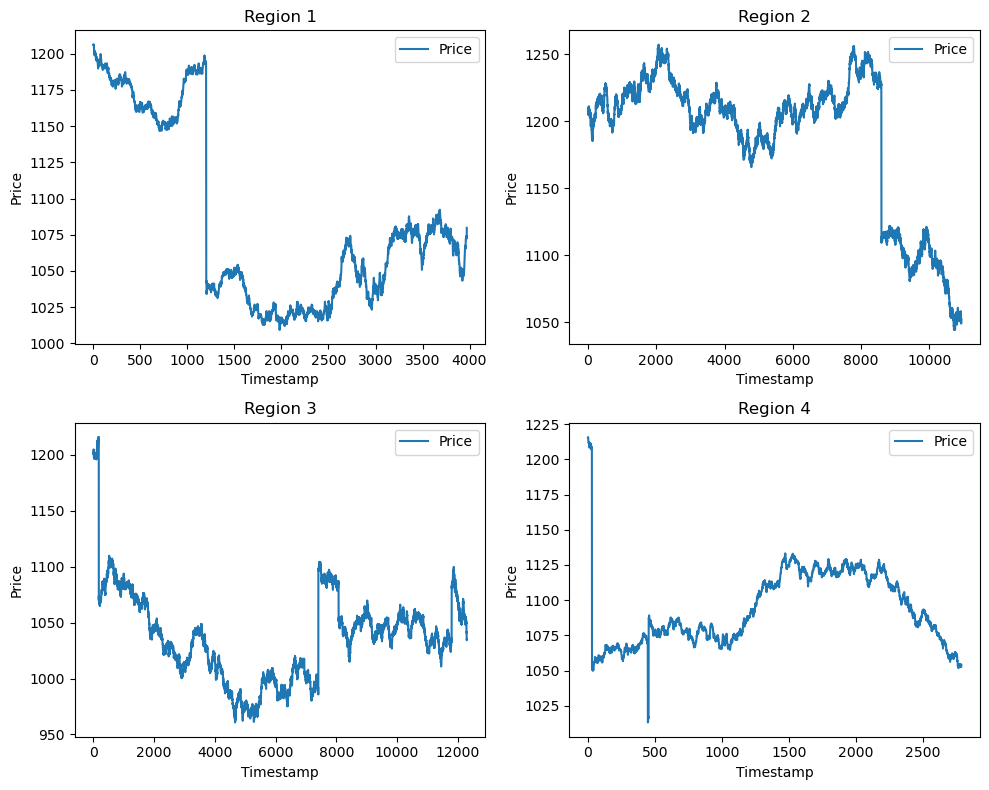

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, (region_name, region_df) in enumerate(zip(["Region 1", "Region 2", "Region 3", "Region 4"],
                                                  [region_1, region_2, region_3, region_4])):
    ax = axes[i]
    ax.plot(region_df.index, region_df["ORCHIDS"], label="Price")
    ax.set_title(region_name)
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Price")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

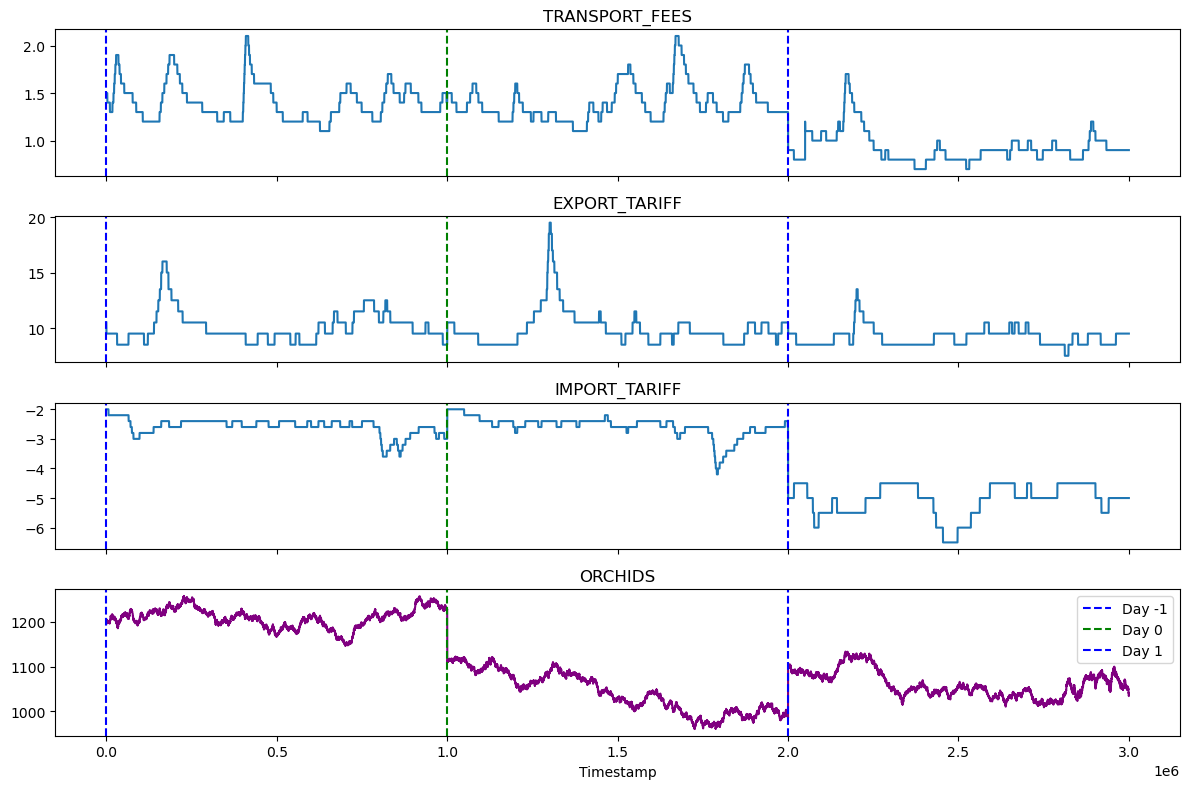

In [279]:
def plot_orchids_fees_tariffs(df):
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
    
    # Plot TRANSPORT_FEES vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['TRANSPORT_FEES'])
    axs[0].set_title('TRANSPORT_FEES')
    
    # Plot EXPORT_TARIFF vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['EXPORT_TARIFF'])
    axs[1].set_title('EXPORT_TARIFF')
    
    # Plot IMPORT_TARIFF vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['IMPORT_TARIFF'])
    axs[2].set_title('IMPORT_TARIFF')

    axs[3].plot(df['new_timestamp'], df['ORCHIDS'], color='purple')
    axs[3].set_title('ORCHIDS')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_fees_tariffs(orchids)

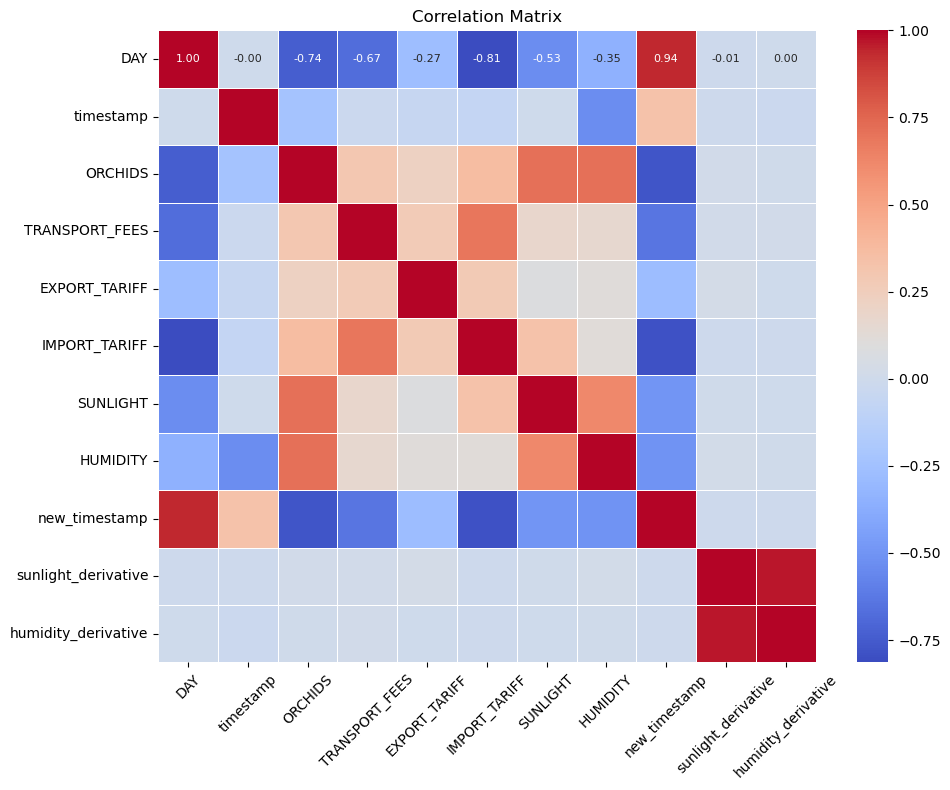

In [280]:
correlation_matrix = orchids.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [281]:
import statsmodels.api as sm

X = orchids[['SUNLIGHT', 'HUMIDITY']]
y = orchids['ORCHIDS']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                 2.514e+04
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:20:58   Log-Likelihood:            -1.6001e+05
No. Observations:               30003   AIC:                         3.200e+05
Df Residuals:                   30000   BIC:                         3.201e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        693.3201      2.593    267.428      0.0

In [282]:
X = orchids[['SUNLIGHT', 'HUMIDITY']]
y = orchids['ORCHIDS']

model = sm.OLS(y, X, has_constant=False)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.147e+06
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:21:01   Log-Likelihood:                     -1.7830e+05
No. Observations:               30003   AIC:                                  3.566e+05
Df Residuals:                   30001   BIC:                                  3.566e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['has_constant']
  warnings.warn(msg, ValueWarning)


### Sunlight Conversion

# Still working on it

In [120]:
daily_sunlight = (orchids.groupby(['DAY'])['SUNLIGHT'].sum())/60000
daily_sunlight

DAY
-1    603.352013
 0    379.960218
 1    405.363262
Name: SUNLIGHT, dtype: float64

In [109]:
daily_sunlight = orchids.groupby(['DAY'])['SUNLIGHT'].median()

# Calculate number of hours of sunlight per day
average_sunlight_per_hour = 2500  # Average sunlight per hour
hours_of_sunlight_per_day = daily_sunlight / average_sunlight_per_hour

# Add the number of hours of sunlight per day to the DataFrame
orchids['Hours_of_Sunlight_Per_Day'] = orchids['DAY'].map(hours_of_sunlight_per_day)

orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,Hours_of_Sunlight_Per_Day
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,1.447900
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,1.447900
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,1.447900
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,1.447900
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,1.447900
...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.972775
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.972775
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.972775
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.972775


In [133]:
orchids = orchids[orchids['DAY'] == 1]
orchids = orchids[orchids['timestamp'] <= 10000]
daily_sunlight = orchids['ORCHIDS'].median()
daily_sunlight

1099.75

In [123]:
# Function to split the sunlight data into equal parts and calculate median for each part
def split_and_median(series, num_parts):
    # Calculate the number of elements per part
    elements_per_part = len(series) // num_parts
    
    # Split the series into equal parts
    parts = [series[i*elements_per_part:(i+1)*elements_per_part] for i in range(num_parts)]
    
    # Calculate the median for each part, excluding NaN values
    medians = [np.nanmedian(part) for part in parts]
    
    return medians

# Apply the function to each day and concatenate the results
hourly_median_sunlight = orchids.groupby('DAY').apply(split_and_median, num_parts=num_parts)

# Calculate the final median for each day
final_median_sunlight = hourly_median_sunlight.groupby('DAY').median()

# Print the final median sunlight for each day
print(final_median_sunlight)

TypeError: agg function failed [how->median,dtype->object]

In [116]:
average_sunlight = 7/24*10000
average_sunlight

2916.666666666667

In [201]:
def production_decay(minutes_of_sunlight):
    return 100 * (1 - 0.04) ** ((minutes_of_sunlight - 420) / 10)

# Example usage:
minutes_of_sunlight = 420
production_level = production_decay(minutes_of_sunlight)
print("Production level for 420 minutes of sunlight:", production_level)

minutes_of_sunlight = 400
production_level = production_decay(minutes_of_sunlight)
print("Production level for 400 minutes of sunlight:", production_level)

minutes_of_sunlight = 380
production_level = production_decay(minutes_of_sunlight)
print("Production level for 380 minutes of sunlight:", production_level)

Production level for 420 minutes of sunlight: 100.0
Production level for 400 minutes of sunlight: 108.50694444444444
Production level for 380 minutes of sunlight: 117.73756992669755


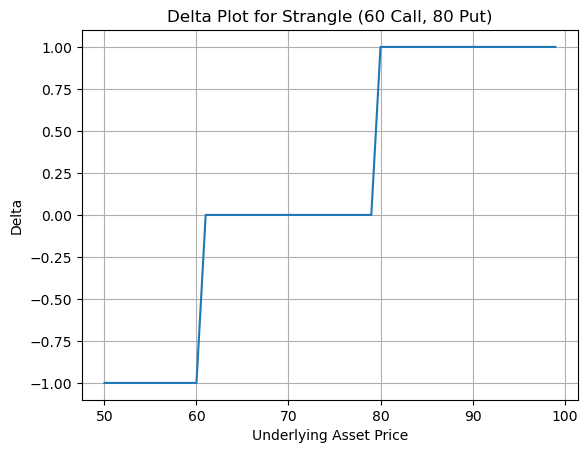

In [283]:
# Define strike prices
strike_call = 60
strike_put = 80

# Define underlying asset prices range
underlying_prices = np.arange(50, 100, 1)

# Calculate delta for call option
delta_call = np.where(underlying_prices > strike_call, 1, 0)

# Calculate delta for put option
delta_put = np.where(underlying_prices < strike_put, -1, 0)

# Combine delta values for strangle
delta_strangle = delta_call + delta_put

# Plot delta of strangle
plt.plot(underlying_prices, delta_strangle)
plt.xlabel('Underlying Asset Price')
plt.ylabel('Delta')
plt.title('Delta Plot for Strangle (60 Call, 80 Put)')
plt.grid(True)
plt.show()

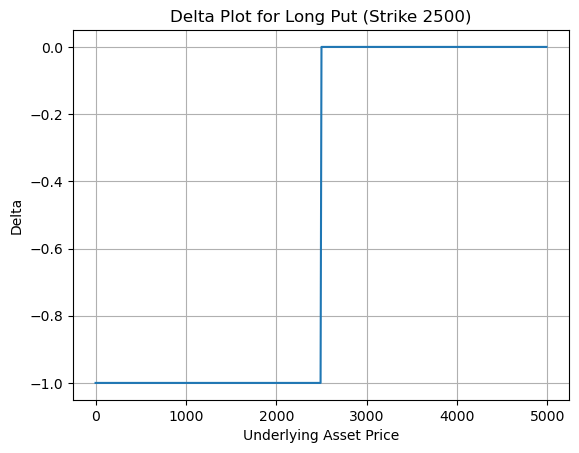

In [284]:
# Define strike price
strike_put = 2500

# Define underlying asset prices range
underlying_prices = np.arange(0, 5000, 10)

# Calculate delta for put option
delta_put = np.where(underlying_prices < strike_put, -1, 0)

# Plot delta of put option
plt.plot(underlying_prices, delta_put)
plt.xlabel('Underlying Asset Price')
plt.ylabel('Delta')
plt.title('Delta Plot for Long Put (Strike 2500)')
plt.grid(True)
plt.show()